In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
pd.set_option('display.max_rows', df.shape[0]+1)
# pd.set_option('display.max_rows', 10)

NameError: name 'df' is not defined

In [414]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col=0)
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv', index_col=0)

In [415]:
print(train_data.shape)
train_data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [416]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Removing missing values

In [417]:
train_data[train_data.FireplaceQu.notnull()]["SalePrice"].describe()

count       770.000000
mean     216397.692208
std       86843.901262
min       60000.000000
25%      159000.000000
50%      191000.000000
75%      257375.000000
max      755000.000000
Name: SalePrice, dtype: float64

### First, let's remove variables with most of the values missing

In [1380]:
y = train_data.SalePrice
X = train_data.drop(['SalePrice'], axis=1)

In [1381]:
df = pd.concat([X , test_data])
# df = df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley'], axis=1)

In [1382]:
df.shape

(2919, 79)

## Then let's remove missing values

In [1383]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.isnull().sum().sort_values(ascending=False))

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
SaleType            1
BsmtFinSF1          1
KitchenQual         1
GarageCars          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
MSSubClass          0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

## Numerical values

In [1384]:
numerical = list( df.loc[:,df.dtypes != 'object'].columns.values )
categorical = list( df.loc[:,df.dtypes == 'object'].columns.values )

In [1385]:
missing_num = df[numerical].isnull().sum()
missing_num = missing_num[missing_num > 0]
missing_num.sort_values()

BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
BsmtFullBath      2
BsmtHalfBath      2
MasVnrArea       23
GarageYrBlt     159
LotFrontage     486
dtype: int64

In [1386]:
x = [1000, 2000, 4000, 10000, 25000, 50000, 500000]

df['LotFrontage'] = df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].apply(lambda x: x.fillna(x.median()))

# df.groupby(pd.cut(df['LotArea'], x))['LotFrontage'].median()

# numerical.remove("LotFrontage")
for feature in numerical:
    df[feature] = df[feature].fillna(0)

### Categorical values

In [1387]:
missing_cat = df[categorical].isnull().sum()
missing_cat = missing_cat[missing_cat > 0]
missing_cat.sort_values()

Electrical         1
KitchenQual        1
Exterior2nd        1
SaleType           1
Exterior1st        1
Utilities          2
Functional         2
MSZoning           4
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtCond          82
BsmtExposure      82
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
FireplaceQu     1420
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64

In [1388]:
cat_exclude = ['MasVnrType', "MSZoning", "Functional", "Utilities", "Exterior1st", "SaleType", "Exterior2nd", "KitchenQual", "Electrical"]
for feature in missing_cat.drop(cat_exclude).index:
    df[feature] = df[feature].fillna("NA")

In [1389]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [1390]:
df['MasVnrType'] = df.FireplaceQu.fillna("None")
cat_exclude.remove("MasVnrType")

In [1391]:
df[cat_exclude] = df.groupby('Neighborhood')[cat_exclude].transform(lambda x: x.fillna(x.mode()[0]))   

In [1392]:
df[df.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,


## Change categories to numbers

In [1393]:
df.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [1394]:
rate_0 = ['NA', 'None']
rate_1 = ['C (all)', 'Grvl', 'Reg', 'Low', 'ELO', 'Inside','Sev', 'Po', 'No', 'Unf', 'Sev', 'MnWw']
rate_2 = ['FV', 'Pave', 'IR1', 'HLS', 'NoSeWa','Corner','Mod', 'Fa', 'Mn','LwQ', 'Maj2', 'RFn', 'GdWo']
rate_3 = ['RH', 'IR2', 'Bnk', 'NoSewr','CulDSac','Gtl', 'TA', 'Av', 'Rec', 'Maj1', 'Fin', 'MnPrv']
rate_4 = ['RM', 'IR3', 'Lvl', 'AllPub','FR2', 'Gd', 'BLQ', 'Mod', 'GdPrv']
rate_5 = ['RL','FR3','Ex','ALQ', 'Min2']
rate_6 = ['GLQ', 'Min1']
rate_7 = ['Typ']

rate = [rate_0, rate_1, rate_2, rate_3, rate_4, rate_5, rate_6, rate_7]

# Given a categorical value [cat], return [i] such that [cat \in rate_i]
def cat_to_int(cat): 
    return next(filter(lambda rate_i : cat in rate_i[1], enumerate(rate)))[0] 

# List of all categorical values
flat_rate = sum(rate, [])

# Generate the dictionary
replace_dictionary = dict( map(lambda cat: (cat, cat_to_int(cat)), flat_rate ) )

In [1395]:
df[categorical] = df[categorical].replace(replace_dictionary)

## Let's add new features

In [1396]:
GoodNbrh = ['NridgHt', 'Crawfor', 'StoneBr', 'Somerst', 'NoRidge']
df.loc[df.Neighborhood.isin(GoodNbrh), "Neighborhood_Good"] = 1
df["Neighborhood_Good"].fillna(0, inplace=True)


In [1397]:
df['TotalExtraPoints'] = df.HeatingQC + df.PoolQC + df.FireplaceQu + df.KitchenQual
df['TotalPoints'] = (df.ExterQual + df.FireplaceQu + df.GarageQual + df.KitchenQual +
                      df.BsmtQual + df.BsmtExposure + df.BsmtFinType1 + df.PoolQC + 
                      df.ExterCond + df.BsmtCond + df.GarageCond + df.OverallCond +
                      df.BsmtFinType2 + df.HeatingQC ) + df.OverallQual**2

In [1398]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['TotalSF'] = (df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']).astype(int)
df['YearsSinceRemodel'] = df['YrSold'].astype(int) - df['YearRemodAdd'].astype(int)
df["Remodeled"] = (df["YearRemodAdd"] != df["YearBuilt"]).astype(int)
df["RecentRemodel"] = (df["YearRemodAdd"] == df["YrSold"]).astype(int)
df['ConstructArea'] = (df.TotalBsmtSF + df.WoodDeckSF + df.GrLivArea +df['3SsnPorch']+
                       df.OpenPorchSF + df.ScreenPorch + df.EnclosedPorch +
                       df.MasVnrArea + df.GarageArea + df.PoolArea )
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df.WoodDeckSF+df['3SsnPorch']
# df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)



In [1343]:
# df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
# df['Total_Bathrooms'] = ((df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))).astype(int)

In [1399]:
df[['TotalSF']].corrwith(y)

TotalSF    0.78226
dtype: float64

## Deal with outliers

In [1400]:
# df["SalePrice"] = y
numeric_columns = df.select_dtypes(['int64','float64']).columns
numeric = df[numeric_columns]

In [1401]:
df.loc[(df['GarageYrBlt'] > 2020), 'GarageYrBlt'] = 2007

In [1347]:
df.loc[[250]].LotArea = 15900

In [1348]:
# outliers = [1299, 336]

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


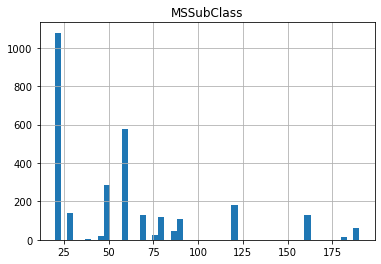

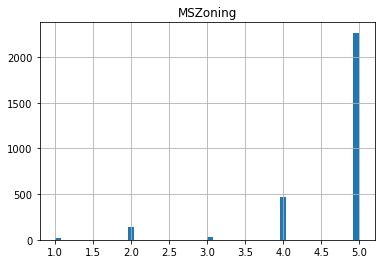

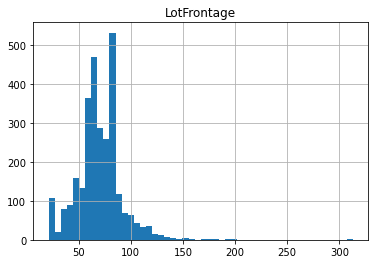

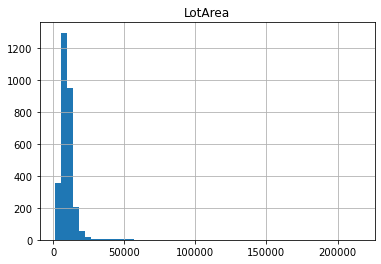

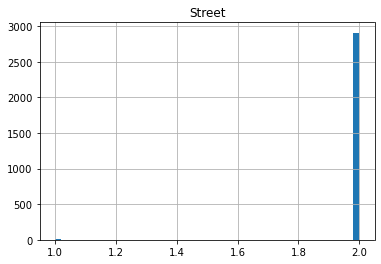

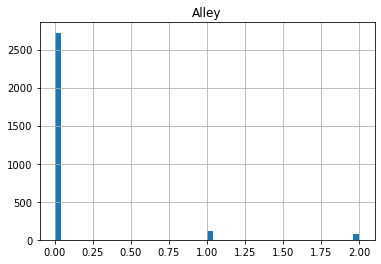

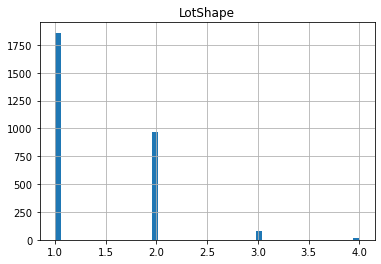

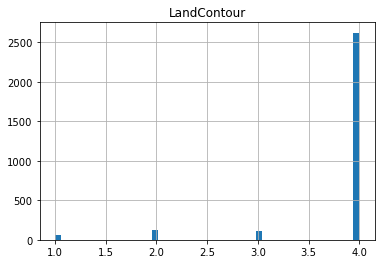

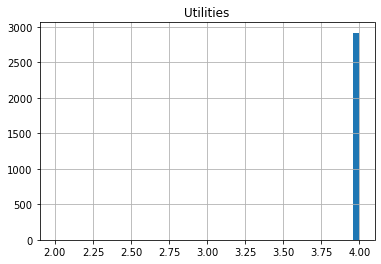

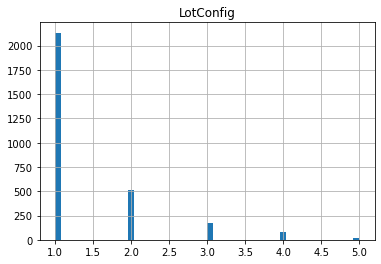

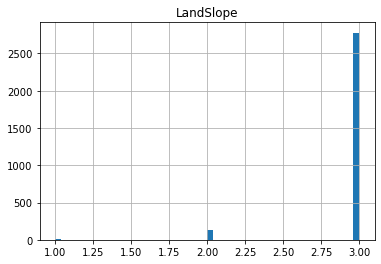

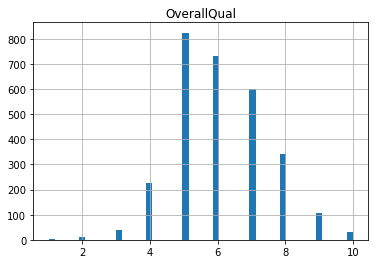

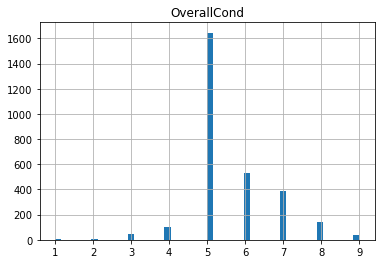

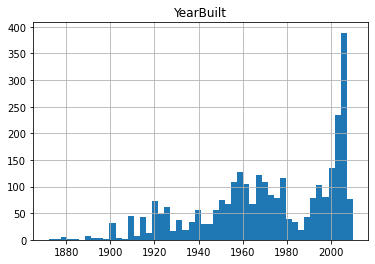

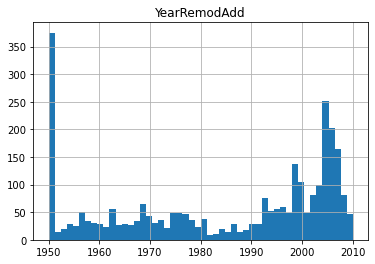

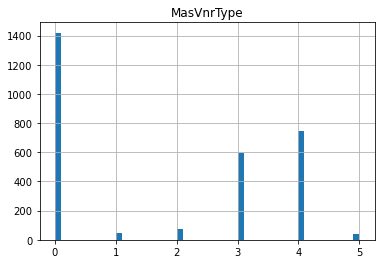

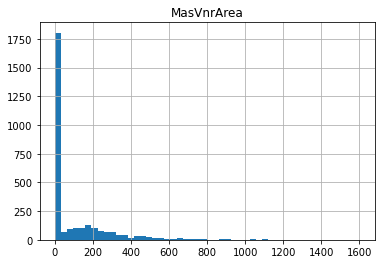

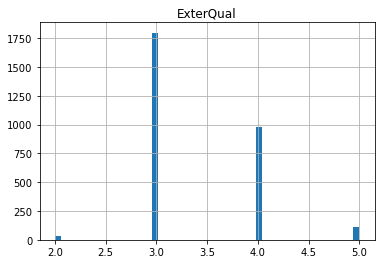

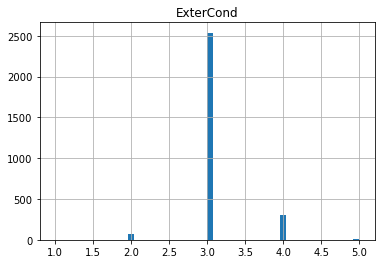

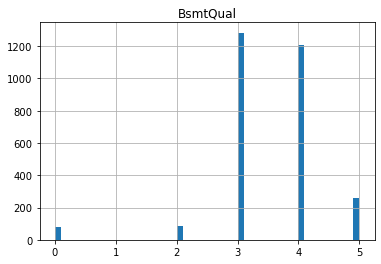

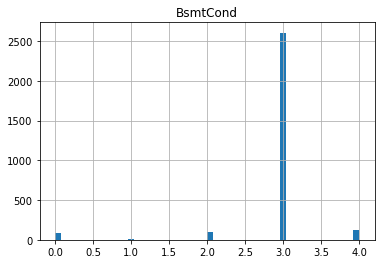

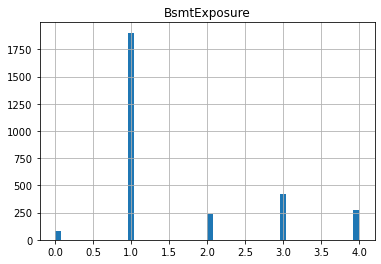

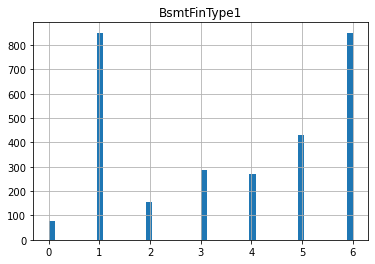

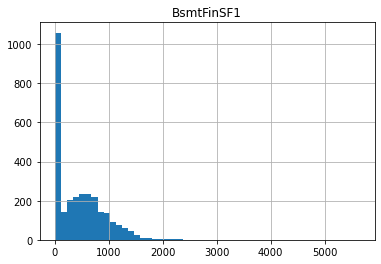

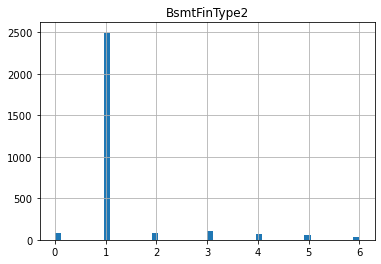

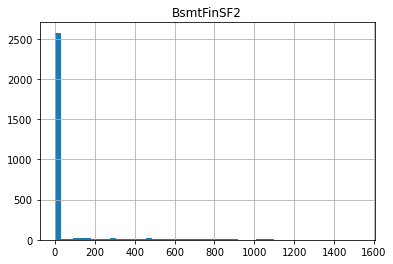

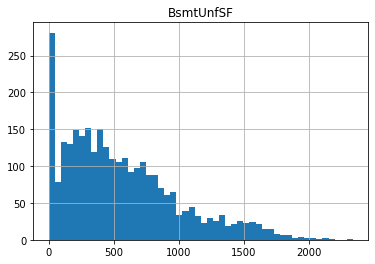

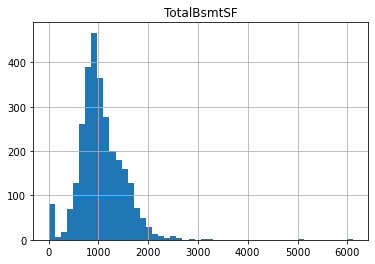

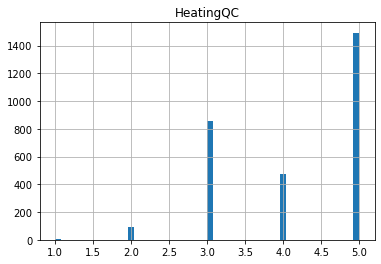

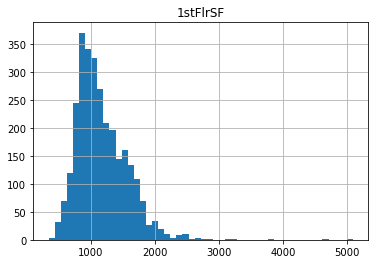

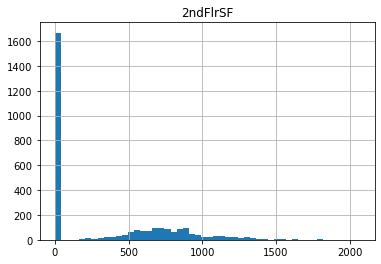

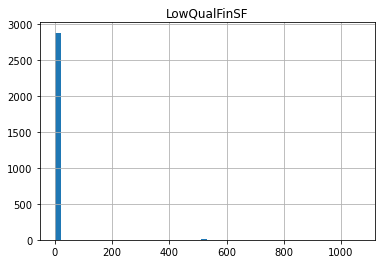

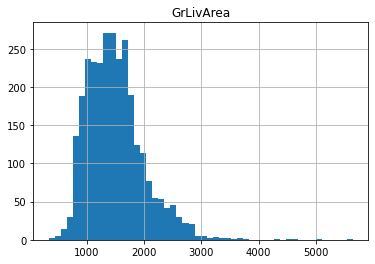

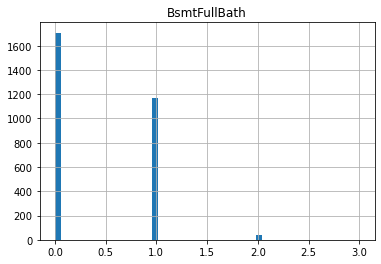

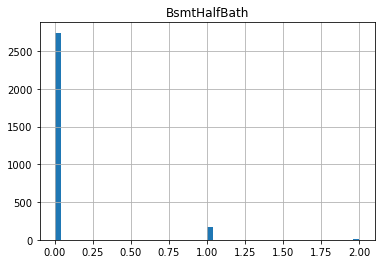

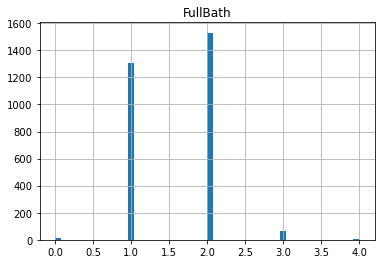

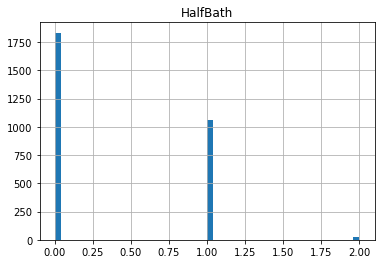

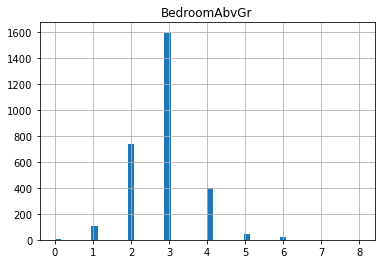

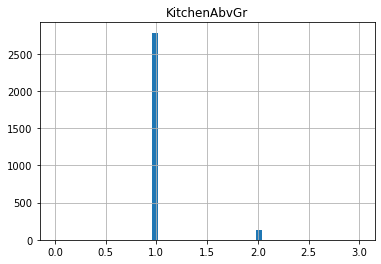

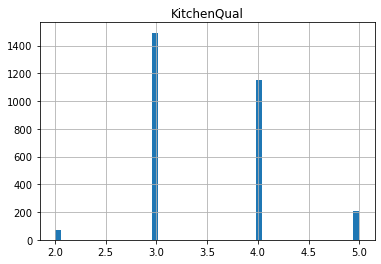

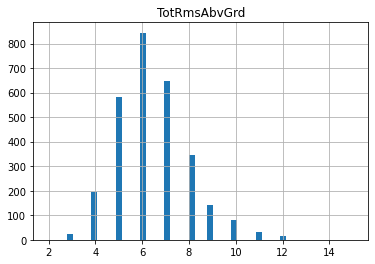

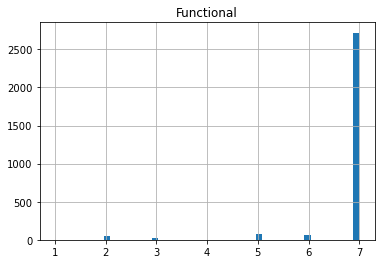

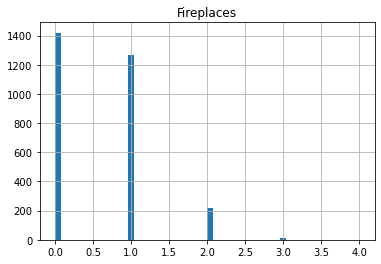

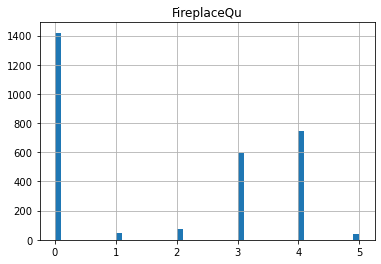

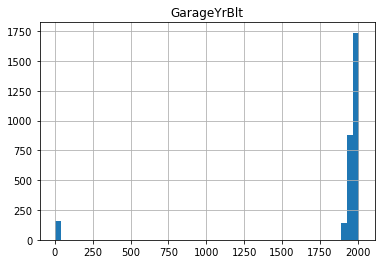

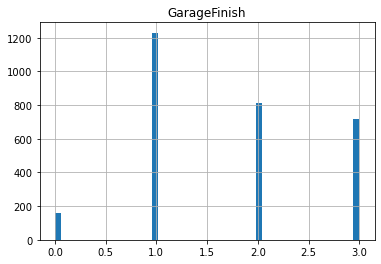

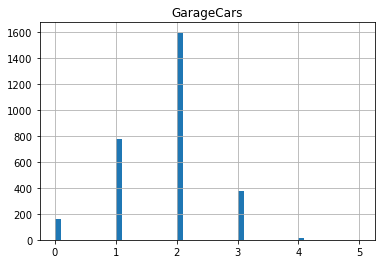

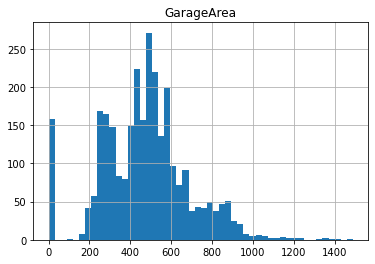

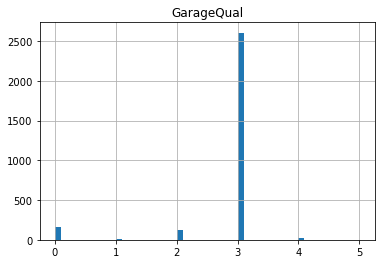

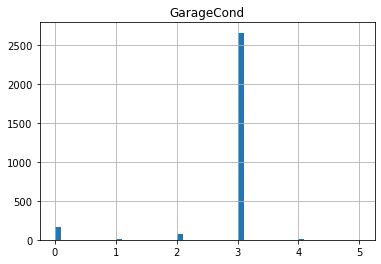

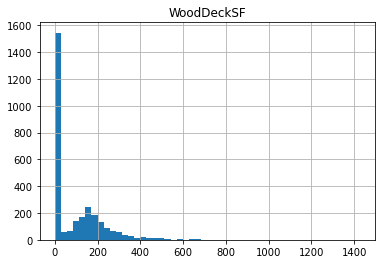

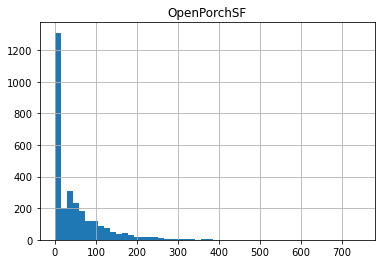

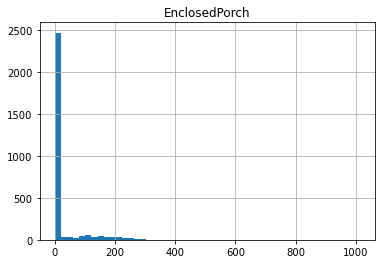

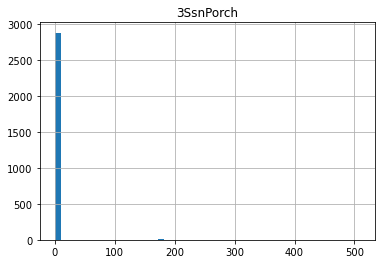

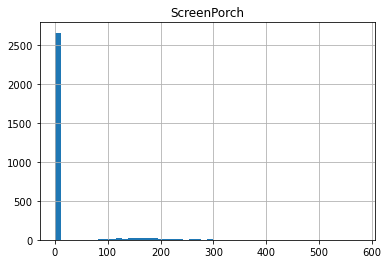

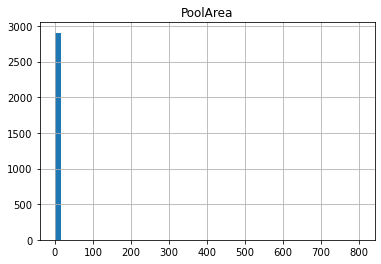

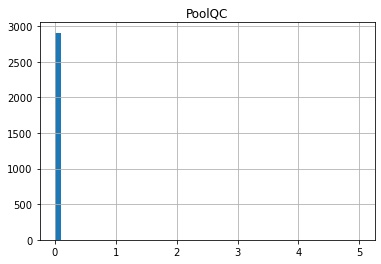

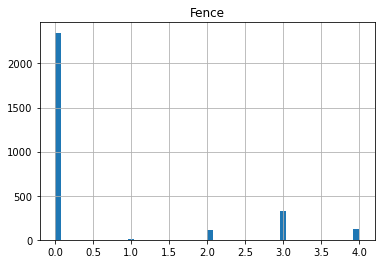

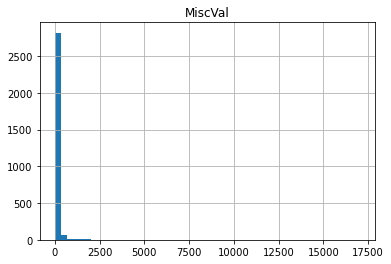

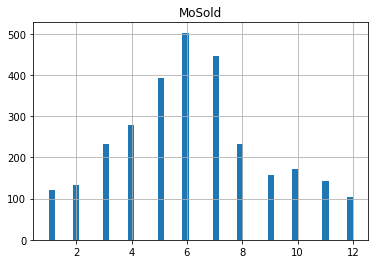

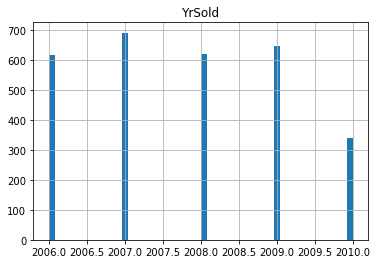

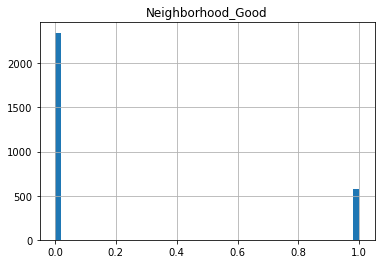

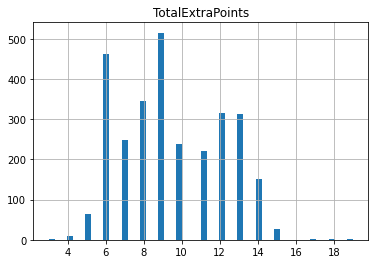

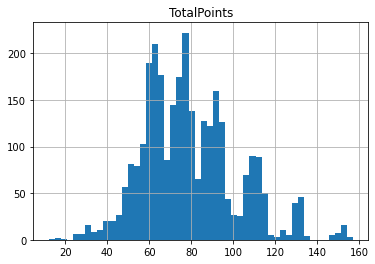

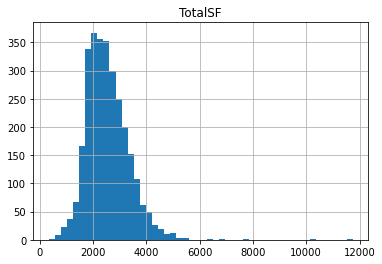

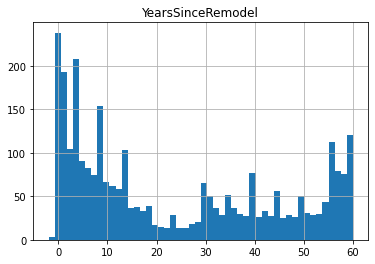

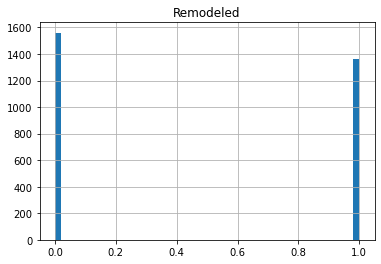

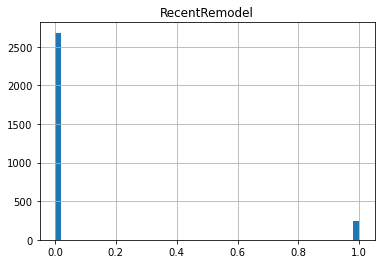

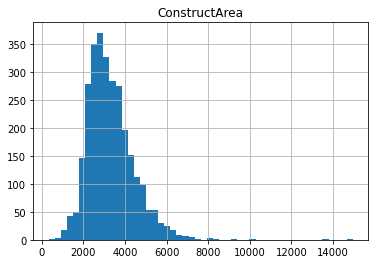

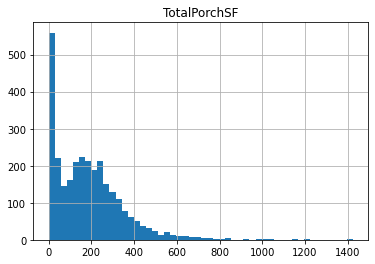

In [1349]:
for i, feature in enumerate(numeric.columns):
#     print(feature)
    plt.figure(i)
    plt.title(feature)
    df[feature].hist(bins=50)
#     plt.axvline(x= value_of_outliers(feature) , color='r')

#     (np.log1p(df[feature])).hist(bins = 50)

In [1402]:
outliers = df[(df.LotFrontage > 250) | (df.LotArea > 100000) | (df.MasVnrArea > 1400) | (df.BsmtFinSF1 > 3000) | 
   (df.TotalBsmtSF > 4500) | (df['1stFlrSF'] > 4000) | (df.WoodDeckSF > 1000) | (df.OpenPorchSF > 600) |
  (df.EnclosedPorch > 600) | (df.ScreenPorch > 500) | (df.MiscVal> 12500) | (df.TotalSF > 9000)].index

# outliers = df[(df.LotFrontage > 250) | (df.LotArea > 100000) | (df.MasVnrArea > 1400) | (df.BsmtFinSF1 > 3000) | 
#    (df.BsmtFinSF2 > 1400) | (df.TotalBsmtSF > 4500) | (df['1stFlrSF'] > 4000) | (df.WoodDeckSF > 900) |
#     (df.OpenPorchSF > 500) | (df.EnclosedPorch > 500) | (df.ScreenPorch > 500) | (df.MiscVal> 12500) | 
#     (df.GrLivArea > 5000) | (df.TotalSF > 9000)].index
outliers = outliers[outliers< 1460]

In [1403]:
outliers

Int64Index([250, 298, 314, 336, 347, 707, 935, 1299], dtype='int64', name='Id')

<AxesSubplot:>

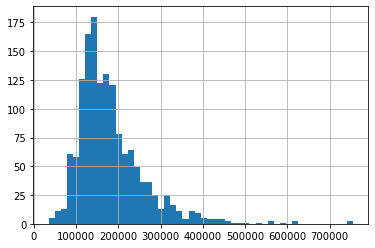

In [1404]:
y.hist(bins=50)

In [1405]:
outliers = outliers.append(y[y > 700000].index)

In [1406]:
outliers

Int64Index([250, 298, 314, 336, 347, 707, 935, 1299, 692, 1183], dtype='int64', name='Id')

In [1407]:
df = df.drop(outliers, axis=0)

In [1408]:
y = y.drop(outliers)

## Fix skewness

<AxesSubplot:>

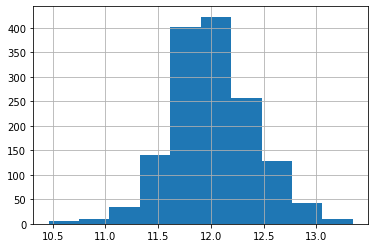

In [1409]:
y = np.log1p(y)
y.hist()

In [1215]:
from scipy.stats import norm, skew

In [1410]:
numeric_feats = df.dtypes[df.dtypes != 'object'].index
skewed_feats = df[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew.head(50)

MiscVal              23.356545
PoolQC               20.900302
PoolArea             18.682408
LowQualFinSF         12.067635
3SsnPorch            11.356127
KitchenAbvGr          4.293726
BsmtFinSF2            4.155970
Alley                 4.145324
EnclosedPorch         3.996150
BsmtHalfBath          3.952687
ScreenPorch           3.951838
LotArea               3.609092
BsmtFinType2          3.159035
RecentRemodel         3.059895
OpenPorchSF           2.537473
MasVnrArea            2.493150
LotConfig             2.134257
WoodDeckSF            1.839411
Fence                 1.752501
Neighborhood_Good     1.532058
TotalPorchSF          1.381688
MSSubClass            1.372362
ExterCond             1.313415
1stFlrSF              1.283180
LotShape              1.237565
BsmtExposure          1.125981
ConstructArea         1.091292
GrLivArea             1.047396
TotalSF               1.018341
BsmtFinSF1            0.990066
BsmtUnfSF             0.917419
2ndFlrSF              0.844248
ExterQua

In [1059]:
# highest_skew = skewed_feats[abs(skewed_feats) > 18].index
# df = df.drop(highest_skew, axis=1)

In [1411]:
for feature in high_skew.index:
    df[feature] = np.log1p(df[feature])

/Users/yulialysenko/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


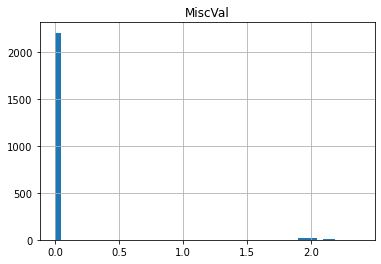

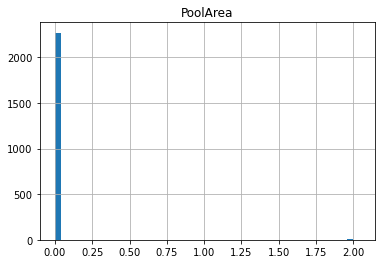

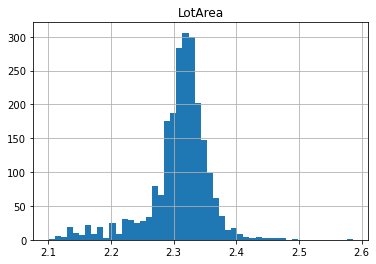

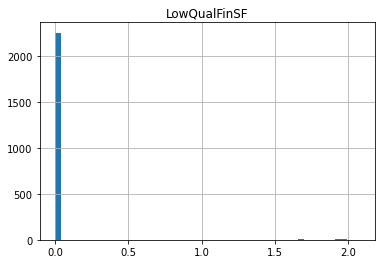

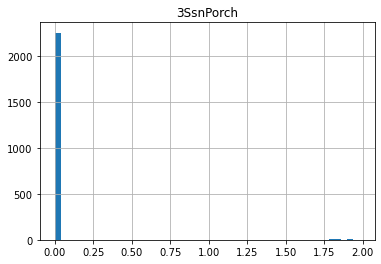

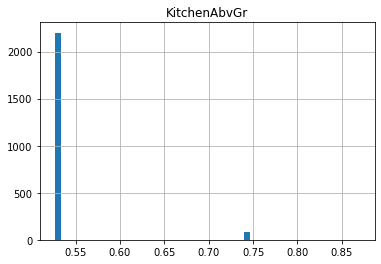

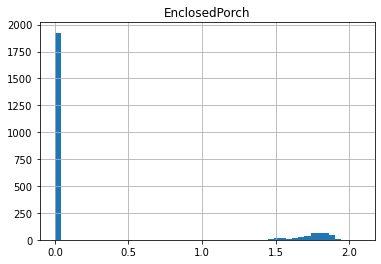

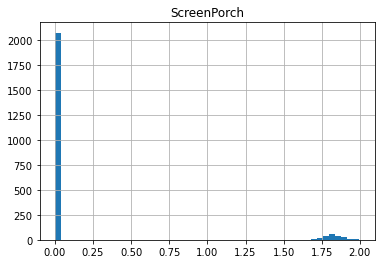

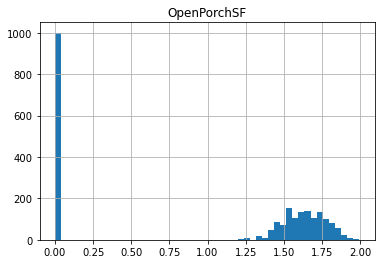

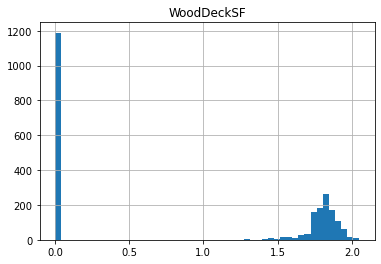

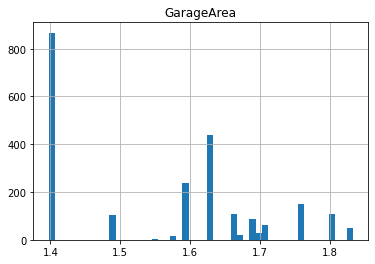

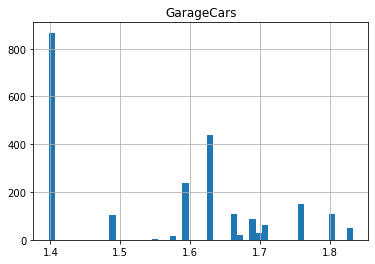

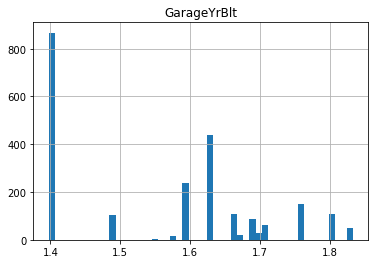

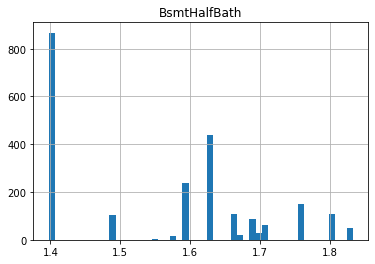

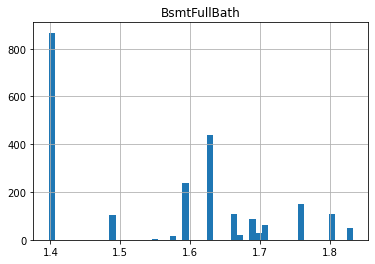

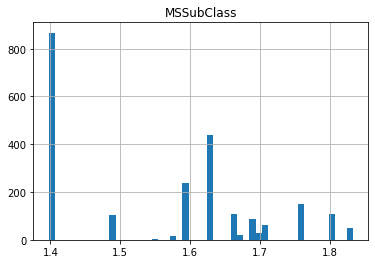

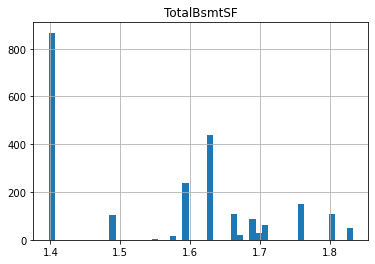

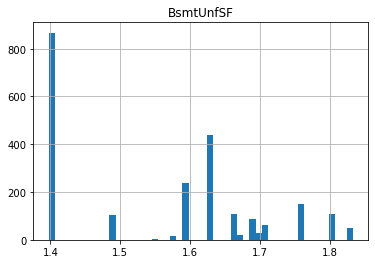

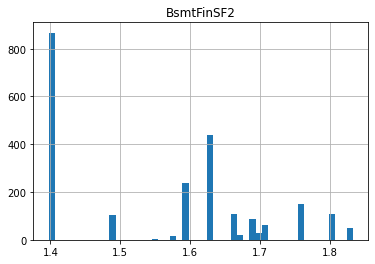

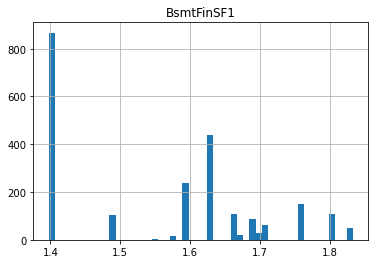

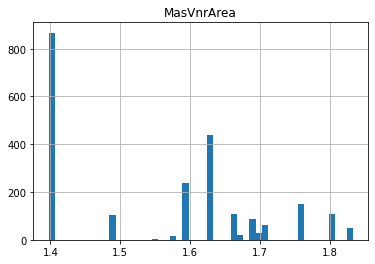

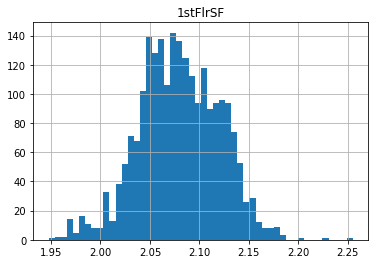

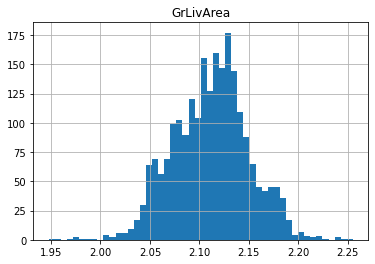

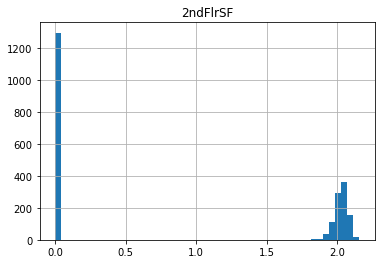

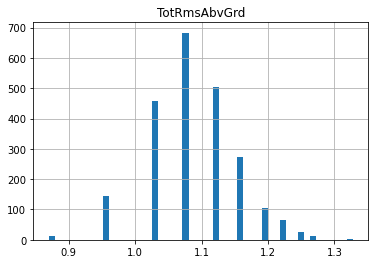

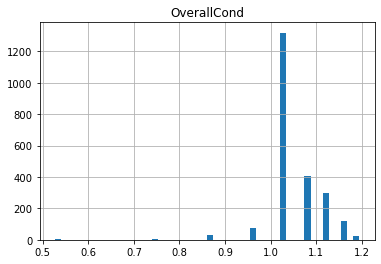

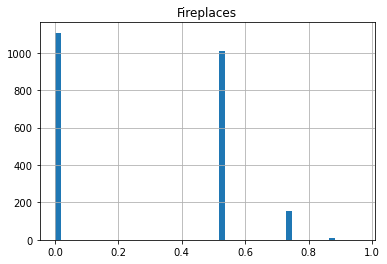

In [35]:
# for i, feature in enumerate(high_skew.index):
#     plt.figure(i)
#     plt.title(feature)
#     (np.log1p(df[feature])).hist(bins = 50)
#     (df[feature]).hist(bins = 50, density = False)

# for feature in high_skew[:5].index:
#     matplotlib.pyplot.subplot(nrows, ncols, r) 
#     plt.hist() 
    
#     (np.log1p(df[feature])).hist()

### Delete variables with low correlation with the price

In [1412]:
corr = df.corrwith(y)#["SalePrice"]

In [1413]:
corr[abs(corr) < 0.03]

MSSubClass     -0.021083
Utilities       0.012536
LandSlope      -0.008624
OverallCond    -0.002302
BsmtHalfBath   -0.017698
dtype: float64

In [1220]:
low_corr = corr[abs(corr) < 0.03].index#["LowQualFinSF", "MiscVal", "YrSold", "OverallCond"]

In [1221]:
df = df.drop(low_corr, axis=1)

## Adding categorical columns

In [1414]:
df = pd.get_dummies(df)


In [1415]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,4.110874,1.791759,4.189655,9.042040,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
2,3.044522,1.791759,4.394449,9.169623,1.098612,0.0,0.693147,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,1.791759,4.234107,9.328212,1.098612,0.0,1.098612,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
4,4.262680,1.791759,4.110874,9.164401,1.098612,0.0,1.098612,1.609438,1.609438,1.098612,...,0,0,0,1,1,0,0,0,0,0
5,4.110874,1.791759,4.442651,9.565284,1.098612,0.0,1.098612,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0


### Divide into train and test

In [1416]:
train = df[:len(train_data)-len(outliers)]
test = df[len(train_data)-len(outliers):]

In [1417]:
print(train.shape, test.shape, train_data.shape)

(1450, 218) (1459, 218) (1460, 80)


In [1418]:
X = train

In [1364]:
# y = y.drop(outliers)

## Training

In [1419]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [1420]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
544,4.795791,1.386294,3.555348,8.308692,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
762,3.433987,1.609438,4.110874,8.841014,1.098612,0.0,0.693147,1.609438,1.609438,1.609438,...,0,0,0,1,0,0,0,0,1,0
50,3.044522,1.791759,4.204693,8.954544,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
1391,3.044522,1.791759,4.262680,9.116140,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0
142,3.044522,1.791759,4.369448,9.362718,1.098612,0.0,0.693147,1.609438,1.609438,0.693147,...,0,0,0,1,0,0,0,0,1,0


In [1292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [1421]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction_rf = rf.predict(X_test)


In [1368]:
from catboost import CatBoostRegressor

In [1422]:
catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.038826
0:	learn: 0.3819317	total: 7.19ms	remaining: 7.18s
1:	learn: 0.3720421	total: 12.9ms	remaining: 6.42s
2:	learn: 0.3626718	total: 18.6ms	remaining: 6.18s
3:	learn: 0.3537287	total: 23.9ms	remaining: 5.94s
4:	learn: 0.3450986	total: 29.2ms	remaining: 5.81s
5:	learn: 0.3367028	total: 34.6ms	remaining: 5.72s
6:	learn: 0.3286892	total: 40.2ms	remaining: 5.71s
7:	learn: 0.3205977	total: 45.6ms	remaining: 5.66s
8:	learn: 0.3130469	total: 50.8ms	remaining: 5.6s
9:	learn: 0.3061141	total: 56.1ms	remaining: 5.55s
10:	learn: 0.2990724	total: 61.4ms	remaining: 5.52s
11:	learn: 0.2921530	total: 67ms	remaining: 5.51s
12:	learn: 0.2851457	total: 72.6ms	remaining: 5.51s
13:	learn: 0.2790895	total: 79.4ms	remaining: 5.59s
14:	learn: 0.2732811	total: 85.4ms	remaining: 5.6s
15:	learn: 0.2671795	total: 90.5ms	remaining: 5.57s
16:	learn: 0.2612765	total: 95.8ms	remaining: 5.54s
17:	learn: 0.2559580	total: 101ms	remaining: 5.52s
18:	learn: 0.2509732	total: 107ms	remaining: 5.5s

184:	learn: 0.0952668	total: 967ms	remaining: 4.26s
185:	learn: 0.0950511	total: 971ms	remaining: 4.25s
186:	learn: 0.0948624	total: 976ms	remaining: 4.25s
187:	learn: 0.0947387	total: 981ms	remaining: 4.24s
188:	learn: 0.0945404	total: 987ms	remaining: 4.23s
189:	learn: 0.0943089	total: 992ms	remaining: 4.23s
190:	learn: 0.0941627	total: 997ms	remaining: 4.22s
191:	learn: 0.0940550	total: 1s	remaining: 4.22s
192:	learn: 0.0939390	total: 1.01s	remaining: 4.21s
193:	learn: 0.0939050	total: 1.01s	remaining: 4.21s
194:	learn: 0.0937725	total: 1.02s	remaining: 4.2s
195:	learn: 0.0934830	total: 1.02s	remaining: 4.19s
196:	learn: 0.0933589	total: 1.02s	remaining: 4.18s
197:	learn: 0.0930850	total: 1.03s	remaining: 4.17s
198:	learn: 0.0929226	total: 1.03s	remaining: 4.16s
199:	learn: 0.0927765	total: 1.04s	remaining: 4.16s
200:	learn: 0.0925347	total: 1.04s	remaining: 4.15s
201:	learn: 0.0922755	total: 1.05s	remaining: 4.14s
202:	learn: 0.0920705	total: 1.05s	remaining: 4.13s
203:	learn: 0.09

354:	learn: 0.0720971	total: 1.94s	remaining: 3.53s
355:	learn: 0.0719741	total: 1.95s	remaining: 3.52s
356:	learn: 0.0717984	total: 1.95s	remaining: 3.51s
357:	learn: 0.0717826	total: 1.96s	remaining: 3.51s
358:	learn: 0.0716307	total: 1.96s	remaining: 3.5s
359:	learn: 0.0714984	total: 1.97s	remaining: 3.5s
360:	learn: 0.0714832	total: 1.97s	remaining: 3.49s
361:	learn: 0.0713598	total: 1.98s	remaining: 3.49s
362:	learn: 0.0712823	total: 1.99s	remaining: 3.48s
363:	learn: 0.0711571	total: 1.99s	remaining: 3.48s
364:	learn: 0.0710427	total: 2s	remaining: 3.48s
365:	learn: 0.0709565	total: 2s	remaining: 3.47s
366:	learn: 0.0708391	total: 2.01s	remaining: 3.46s
367:	learn: 0.0707142	total: 2.01s	remaining: 3.46s
368:	learn: 0.0705789	total: 2.02s	remaining: 3.45s
369:	learn: 0.0704785	total: 2.02s	remaining: 3.44s
370:	learn: 0.0703582	total: 2.02s	remaining: 3.43s
371:	learn: 0.0702200	total: 2.03s	remaining: 3.42s
372:	learn: 0.0700994	total: 2.03s	remaining: 3.42s
373:	learn: 0.069991

523:	learn: 0.0563628	total: 2.7s	remaining: 2.45s
524:	learn: 0.0562496	total: 2.71s	remaining: 2.45s
525:	learn: 0.0562136	total: 2.71s	remaining: 2.44s
526:	learn: 0.0561954	total: 2.72s	remaining: 2.44s
527:	learn: 0.0561100	total: 2.72s	remaining: 2.44s
528:	learn: 0.0559594	total: 2.73s	remaining: 2.44s
529:	learn: 0.0558844	total: 2.74s	remaining: 2.43s
530:	learn: 0.0558245	total: 2.75s	remaining: 2.43s
531:	learn: 0.0557187	total: 2.76s	remaining: 2.43s
532:	learn: 0.0556831	total: 2.76s	remaining: 2.42s
533:	learn: 0.0556214	total: 2.77s	remaining: 2.42s
534:	learn: 0.0555192	total: 2.78s	remaining: 2.41s
535:	learn: 0.0554324	total: 2.79s	remaining: 2.41s
536:	learn: 0.0553618	total: 2.8s	remaining: 2.41s
537:	learn: 0.0553363	total: 2.8s	remaining: 2.41s
538:	learn: 0.0552316	total: 2.81s	remaining: 2.4s
539:	learn: 0.0552093	total: 2.82s	remaining: 2.4s
540:	learn: 0.0550737	total: 2.84s	remaining: 2.41s
541:	learn: 0.0550096	total: 2.86s	remaining: 2.41s
542:	learn: 0.054

695:	learn: 0.0446555	total: 3.66s	remaining: 1.6s
696:	learn: 0.0445907	total: 3.67s	remaining: 1.59s
697:	learn: 0.0445857	total: 3.67s	remaining: 1.59s
698:	learn: 0.0445242	total: 3.68s	remaining: 1.58s
699:	learn: 0.0444582	total: 3.69s	remaining: 1.58s
700:	learn: 0.0444301	total: 3.69s	remaining: 1.57s
701:	learn: 0.0444210	total: 3.7s	remaining: 1.57s
702:	learn: 0.0444160	total: 3.7s	remaining: 1.56s
703:	learn: 0.0443590	total: 3.71s	remaining: 1.56s
704:	learn: 0.0442751	total: 3.71s	remaining: 1.55s
705:	learn: 0.0442293	total: 3.72s	remaining: 1.55s
706:	learn: 0.0442254	total: 3.72s	remaining: 1.54s
707:	learn: 0.0441392	total: 3.73s	remaining: 1.54s
708:	learn: 0.0440346	total: 3.73s	remaining: 1.53s
709:	learn: 0.0439719	total: 3.74s	remaining: 1.53s
710:	learn: 0.0439085	total: 3.74s	remaining: 1.52s
711:	learn: 0.0438097	total: 3.75s	remaining: 1.51s
712:	learn: 0.0437308	total: 3.75s	remaining: 1.51s
713:	learn: 0.0437256	total: 3.76s	remaining: 1.5s
714:	learn: 0.04

860:	learn: 0.0367318	total: 4.42s	remaining: 713ms
861:	learn: 0.0366767	total: 4.42s	remaining: 708ms
862:	learn: 0.0366721	total: 4.43s	remaining: 703ms
863:	learn: 0.0366532	total: 4.43s	remaining: 698ms
864:	learn: 0.0365518	total: 4.44s	remaining: 693ms
865:	learn: 0.0365132	total: 4.45s	remaining: 688ms
866:	learn: 0.0364525	total: 4.45s	remaining: 683ms
867:	learn: 0.0364246	total: 4.46s	remaining: 678ms
868:	learn: 0.0364050	total: 4.46s	remaining: 672ms
869:	learn: 0.0363606	total: 4.47s	remaining: 668ms
870:	learn: 0.0363041	total: 4.47s	remaining: 662ms
871:	learn: 0.0362875	total: 4.48s	remaining: 657ms
872:	learn: 0.0362411	total: 4.49s	remaining: 652ms
873:	learn: 0.0362160	total: 4.49s	remaining: 647ms
874:	learn: 0.0362136	total: 4.49s	remaining: 642ms
875:	learn: 0.0361809	total: 4.5s	remaining: 637ms
876:	learn: 0.0361294	total: 4.5s	remaining: 631ms
877:	learn: 0.0361210	total: 4.51s	remaining: 626ms
878:	learn: 0.0360847	total: 4.51s	remaining: 621ms
879:	learn: 0.

In [1423]:
prediction_cb = catboost.predict(X_test)

In [1297]:
from xgboost import XGBRegressor
import xgboost as xgb

xgbr = xgb.XGBRegressor()

In [1298]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1299]:
prediction_xgbr = xgbr.predict(X_test)

## Choosing the best parametres 

### CatBoost

In [1424]:
from sklearn.model_selection import RandomizedSearchCV
catM = CatBoostRegressor(verbose=0, allow_writing_files=False)
params = {'learning_rate': [0.05, 0.005, 0.0005],
          'depth': [4, 5, 6, 7, 8],
          'l2_leaf_reg': [5, 6, 9]}

In [1425]:
grid_search_cat = RandomizedSearchCV(estimator=catM, scoring='neg_root_mean_squared_error', param_distributions=params, n_iter=10, cv=4, verbose=2,
                                 random_state=42, n_jobs=-1)
grid_search_cat.fit(X_train, y_train)
catModel = grid_search_cat.best_estimator_
print('Best params(CatBoost):',grid_search_cat.best_params_)
print('RMSE(CatBoost):', -grid_search_cat.best_score_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.6min finished


Best params(CatBoost): {'learning_rate': 0.05, 'l2_leaf_reg': 6, 'depth': 4}
RMSE(CatBoost): 0.12074408239170253


In [1426]:
#catModel = catBoost(X_train, y_train, X_test)
# catModel = CatBoostRegressor(verbose=0, allow_writing_files=False, learning_rate=0.05, l2_leaf_reg=2, depth=4)


In [1427]:
catModel.fit(X_train, y_train)
prediction_cb_best = catModel.predict(X_test)

### XGBoost

In [508]:
params = {'learning_rate': [0.02], 'n_estimators' : [2000], 'max_depth':[3], 
          'colsample_bytree' : [0.4], 'subsample' : [0.7]}

In [509]:
xgbr_reg = GridSearchCV(xgbr, params, cv = 5, n_jobs =1)
xgbr_reg.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [510]:
print("Best params:{}".format(xgbr_reg.best_params_))

best_x = xgbr_reg.best_estimator_
y_train_pred_x = best_x.predict(X_train)
y_val_pred_x = best_x.predict(X_test)

print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_log_error(y_train, y_train_pred_x))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_log_error(y_test, y_val_pred_x)))) 

Best params:{'colsample_bytree': 0.4, 'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.7}
Root Mean Square Error train = 0.0030053972778739885
Root Mean Square Error test = 0.010086346462917922


In [511]:
prediction_xgbr_best = best_x.predict(X_test)

### Calculate error

In [504]:
from sklearn.metrics import mean_squared_log_error


In [1428]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_rf)))

0.1412278665431039

In [1429]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb)))

0.12196953290021371

In [1430]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_cb_best)))

0.11833876421230229

In [1245]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr)))

0.1420148448126499

In [1246]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(prediction_xgbr_best)))

ValueError: Found input variables with inconsistent numbers of samples: [480, 482]

In [517]:
# mixed_prediction = 0.3* prediction_cb + 0.6 * prediction_cb_best + 0.1*prediction_xgbr_best
mixed_prediction = 0.9 * prediction_cb_best + 0.1*prediction_xgbr_best

In [518]:
np.sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(mixed_prediction)))

0.1241494004144555

In [82]:
y_test

Id
893     11.947956
1106    12.691584
414     11.652696
523     11.976666
1037    12.661917
          ...    
1011    11.813037
391     11.686887
1410    12.278398
848     11.801864
1285    12.037660
Name: SalePrice, Length: 482, dtype: float64

## Make prediction

In [1306]:
y_old = y_pred

In [1431]:
y_pred = catModel.predict(test)
# y_pred = catboost.predict(test)

In [1432]:
np.sqrt(mean_squared_log_error(np.expm1(y_old), np.expm1(y_pred)))

0.04030339503747047

In [1019]:
y_pred

array([11.7668157 , 12.01333859, 12.12474553, ..., 12.03752349,
       11.64036114, 12.23727785])

In [1319]:
tmp = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
tmp['SalePrice'] = np.expm1(y_pred)

In [1320]:
y_pred.shape

(1459,)

In [1321]:
pred_df = tmp[['Id', 'SalePrice']]
pred_df.set_index('Id', inplace=True)

In [1322]:
pred_df

,SalePrice
Id,
1461,130160.265494
1462,164963.311768
1463,182661.605093
1464,198925.584681
1465,190282.353913
...,...
2915,76286.515740
2916,84168.552523
2917,175786.458830


In [1323]:
pred_df.to_csv('out.csv')

In [ ]:
np.sqrt(mean_squared_log_error(pred_df.SalePrice, np.expm1(y_pred)))